<a href="https://colab.research.google.com/github/soraya-mi/flight_anlysis/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flight.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
dataframe=dataframe.drop('id',1)
dataframe=dataframe.drop('index',1)
dataframe.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [101]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# **EDA**

**Non-numerical values**

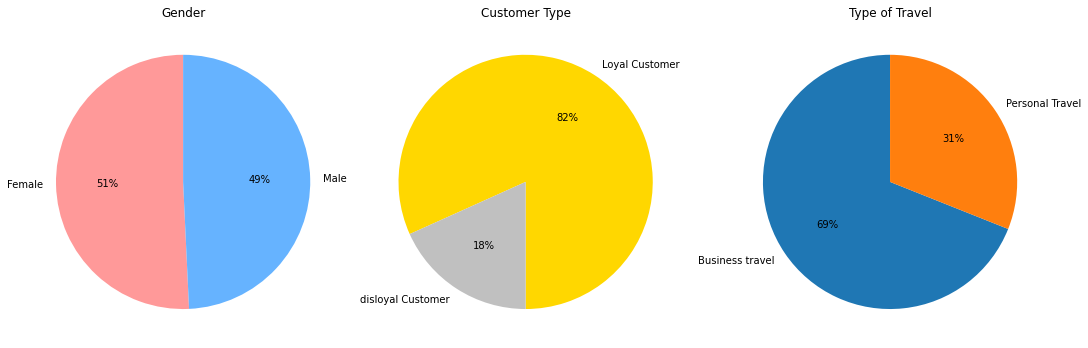

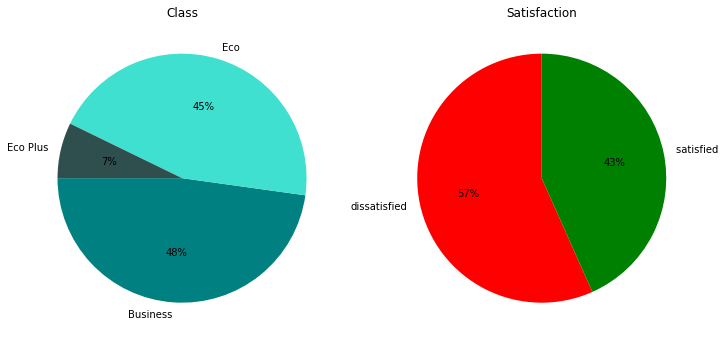

In [102]:
# create subplot 1
f, (ax1, ax2,ax3) = plt.subplots(1, 3,constrained_layout=True,figsize=(15, 10))

# pie chart for gender
y=dataframe.Gender.value_counts(normalize=True)
ax1.set_title("Gender")
ax1.pie(y,labels=['Female','Male'],startangle = 90,colors = ['#ff9999','#66b3ff'],autopct='%1.0f%%')

#piechart for Customer Type
ax2.set_title("Customer Type")
y=dataframe['Customer Type'].value_counts(normalize=True)
ax2.pie(y,labels=['Loyal Customer','disloyal Customer'],startangle = 270,autopct='%1.0f%%',colors=["gold","silver"])

#piechart for Type of Travel
ax3.set_title("Type of Travel")
ax3.pie(dataframe['Type of Travel'].value_counts(normalize=True),labels=['Business travel','Personal Travel'],startangle = 90,autopct='%1.0f%%');

# create subplot 2
f, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True,figsize=(10, 7))
##piechart for Type of Class
ax1.set_title("Class")
class_colors=["teal","turquoise","darkslategrey"]
ax1.pie(dataframe['Class'].value_counts(normalize=True),labels=['Business','Eco','Eco Plus'],startangle = 180,autopct='%1.0f%%',colors=class_colors)
#Pie chart for satisfaction
ax2.set_title("Satisfaction")
ax2.pie(dataframe['satisfaction'].value_counts(normalize=True),labels=['dissatisfied','satisfied '],colors=["red","green"],startangle = 90,autopct='%1.0f%%');

**Numerical values**

Age


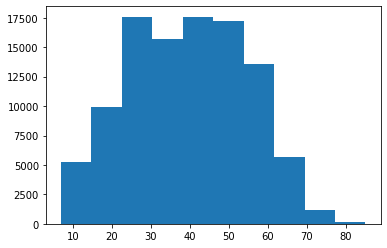

In [107]:
#plot for Age
print("Age")
plt.hist(dataframe.Age)
# plt.set_title("Age")
plt.show()

In [ ]:
from matplotlib.ticker import PercentFormatter
# # create subplot 
# # f, ((ax1, ax2,ax3),(ax4, ax5,ax4),(ax7, ax8,ax9),(ax10, ax11,ax12)) = plt.subplots(4, 3,constrained_layout=True,figsize=(15, 10))
cols=dataframe.columns[8:11]
for col in cols:
  # sns.displot(dataframe,x=dataframe[col],height=3.5, aspect=1.9,stat='percent',kind="hist");
  # print( dataframe[col])
  # y=dataframe[col].plot.hist(bins=5,  alpha=0.5, histtype='bar', ec='black',title=col)
  data=dataframe[col]
  plt.hist(data,alpha=0.5, histtype='bar', ec='black',rwidth=0.5, weights=np.ones(len(data)) / len(data),)
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  # plt.hist(dataframe[col])
  plt.show()
# sns.displot(dataframe,x=dataframe["Departure/Arrival time convenient"],height=3.5, aspect=1.9,stat='percent',kind="hist")

In [ ]:
# # Let's calculate the percentage of each gender status category.
# dataframe.Gender.value_counts(normalize=True)
# #plot the bar graph of percentage gender categories
# dataframe.Gender.value_counts(normalize=True).plot.barh()
# plt.show()

# **Preproccessing**

Encode categorical values


In [108]:
from sklearn.preprocessing import LabelEncoder# creating initial dataframe
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
categorical_columns=["Gender","Customer Type","Type of Travel","Class","satisfaction"]   
for i in categorical_columns:   
  # dataframe[i]=dataframe[i].astype('category')  
  dataframe[i] = labelencoder.fit_transform(dataframe[i])
# dataframe
dataframe.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


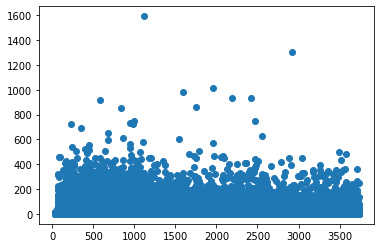

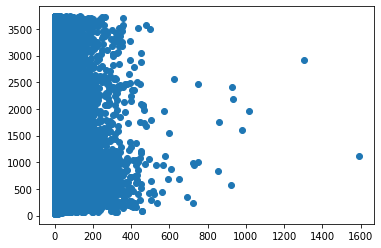

In [116]:
# df.price = df.price.apply(remove_sign,sign='$')
# sns.boxplot(y='Flight Distance', x='Departure Delay in Minutes',data=dataframe)
# plt.xticks(rotation=90)
plt.scatter(dataframe["Flight Distance"], dataframe["Departure Delay in Minutes"])
plt.show()
plt.scatter(dataframe["Departure Delay in Minutes"], dataframe["Flight Distance"])
plt.show()
# plt.scatter(dataframe["Flight Distance"], dataframe["Arrival Delay in Minutes"])
# plt.show()
# plt.scatter(dataframe["Departure Delay in Minutes"], dataframe["Arrival Delay in Minutes"])
# plt.show()

**Remove outliers with IQR**

In [117]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range
def replace_outliers(datacolumn,lowerbound,upperbound,median):
  # print(datacolumn)
  datacolumn=datacolumn.mask(datacolumn>upperbound,median)
  # print(datacolumn)
  datacolumn=datacolumn.mask(datacolumn<lowerbound,median)
  return datacolumn
lowerbound,upperbound = outlier_treatment(m)
outlier_columns=["Flight Distance"] #,"Arrival Delay in Minutes","Departure Delay in Minutes"
for i in outlier_columns:
  print(i,"sum",dataframe[i].sum())
  data_column=dataframe[i][:]
  median=data_column.median()
  lowerbound,upperbound = outlier_treatment(data_column)
  dataframe[i]=replace_outliers(data_column,lowerbound,upperbound,median)
  print(i,"sum",dataframe[i].sum())

dataframe.head()

Flight Distance sum 116615051.0
Flight Distance sum 109691578.0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
